<a href="https://colab.research.google.com/github/Tawhid-Mahmud/Churn-prediction/blob/main/Headstarter_Accelerator_AI_Project_2__Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os #helps us to access dataset that we will load
import pandas as pd #data manipulation library
import numpy as np #allow us to do numerical computing
import matplotlib.pyplot as plt #visualize our data
import seaborn as sns #more advanced visualization

#Downloads the dataset from kaggle

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 133M/149M [00:00<00:00, 163MB/s]
100% 149M/149M [00:00<00:00, 180MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_paths = []

  #iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if it's a directory
    if os.path.isdir(label_path):
      # Iterate throug images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        # Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })
  return df


In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5707,/content/Training/notumor/Tr-no_1035.jpg,notumor
5708,/content/Training/notumor/Tr-no_1404.jpg,notumor
5709,/content/Training/notumor/Tr-no_0239.jpg,notumor
5710,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1306,/content/Testing/notumor/Te-no_0116.jpg,notumor
1307,/content/Testing/notumor/Te-no_0179.jpg,notumor
1308,/content/Testing/notumor/Te-no_0292.jpg,notumor
1309,/content/Testing/notumor/Te-no_0281.jpg,notumor


##Show count of the images in each class

Training data set count

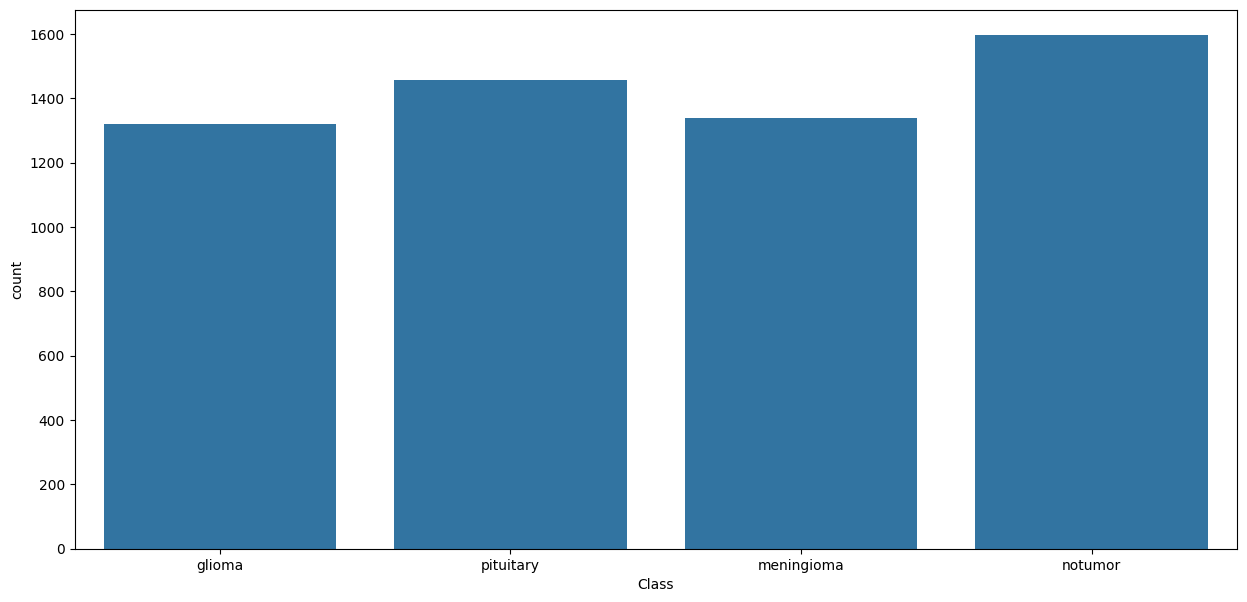

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

Testing data set count

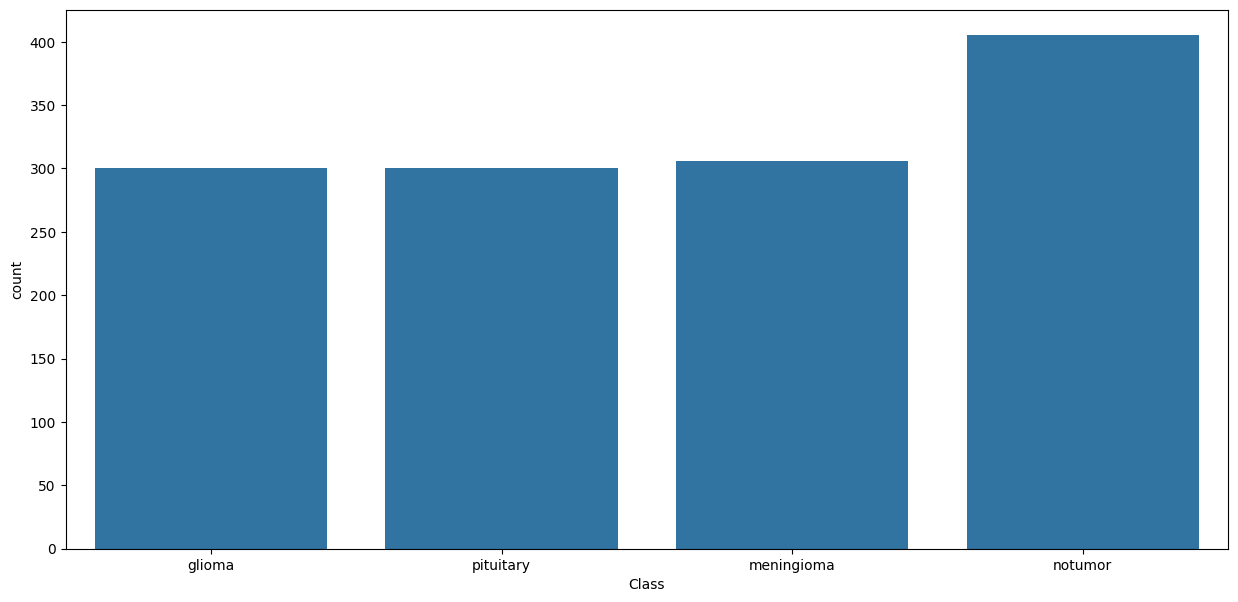

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential #neural network model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
540,/content/Testing/pituitary/Te-pi_0237.jpg,pituitary
618,/content/Testing/meningioma/Te-me_0305.jpg,meningioma
790,/content/Testing/meningioma/Te-me_0021.jpg,meningioma
1241,/content/Testing/notumor/Te-no_0094.jpg,notumor
1047,/content/Testing/notumor/Te-no_0279.jpg,notumor
...,...,...
435,/content/Testing/pituitary/Te-pi_0068.jpg,pituitary
1238,/content/Testing/notumor/Te-no_0217.jpg,notumor
1049,/content/Testing/notumor/Te-no_0034.jpg,notumor
549,/content/Testing/pituitary/Te-pi_0236.jpg,pituitary


In [ ]:
ts_df

,Class Path,Class
475,/content/Testing/pituitary/Te-pi_0158.jpg,pituitary
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
250,/content/Testing/glioma/Te-gl_0117.jpg,glioma
599,/content/Testing/pituitary/Te-pi_0056.jpg,pituitary
148,/content/Testing/glioma/Te-gl_0166.jpg,glioma
...,...,...
631,/content/Testing/meningioma/Te-me_0179.jpg,meningioma
1270,/content/Testing/notumor/Te-no_0023.jpg,notumor
270,/content/Testing/glioma/Te-gl_0195.jpg,glioma
1293,/content/Testing/notumor/Te-no_0119.jpg,notumor


test different batch sizes 16,32,34,128

In [ ]:
batch_size = 32

#resize images to same size
img_size = (299, 299)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

Create 3 different flows training, validation, testing

In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size = 16,
    target_size=img_size, shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


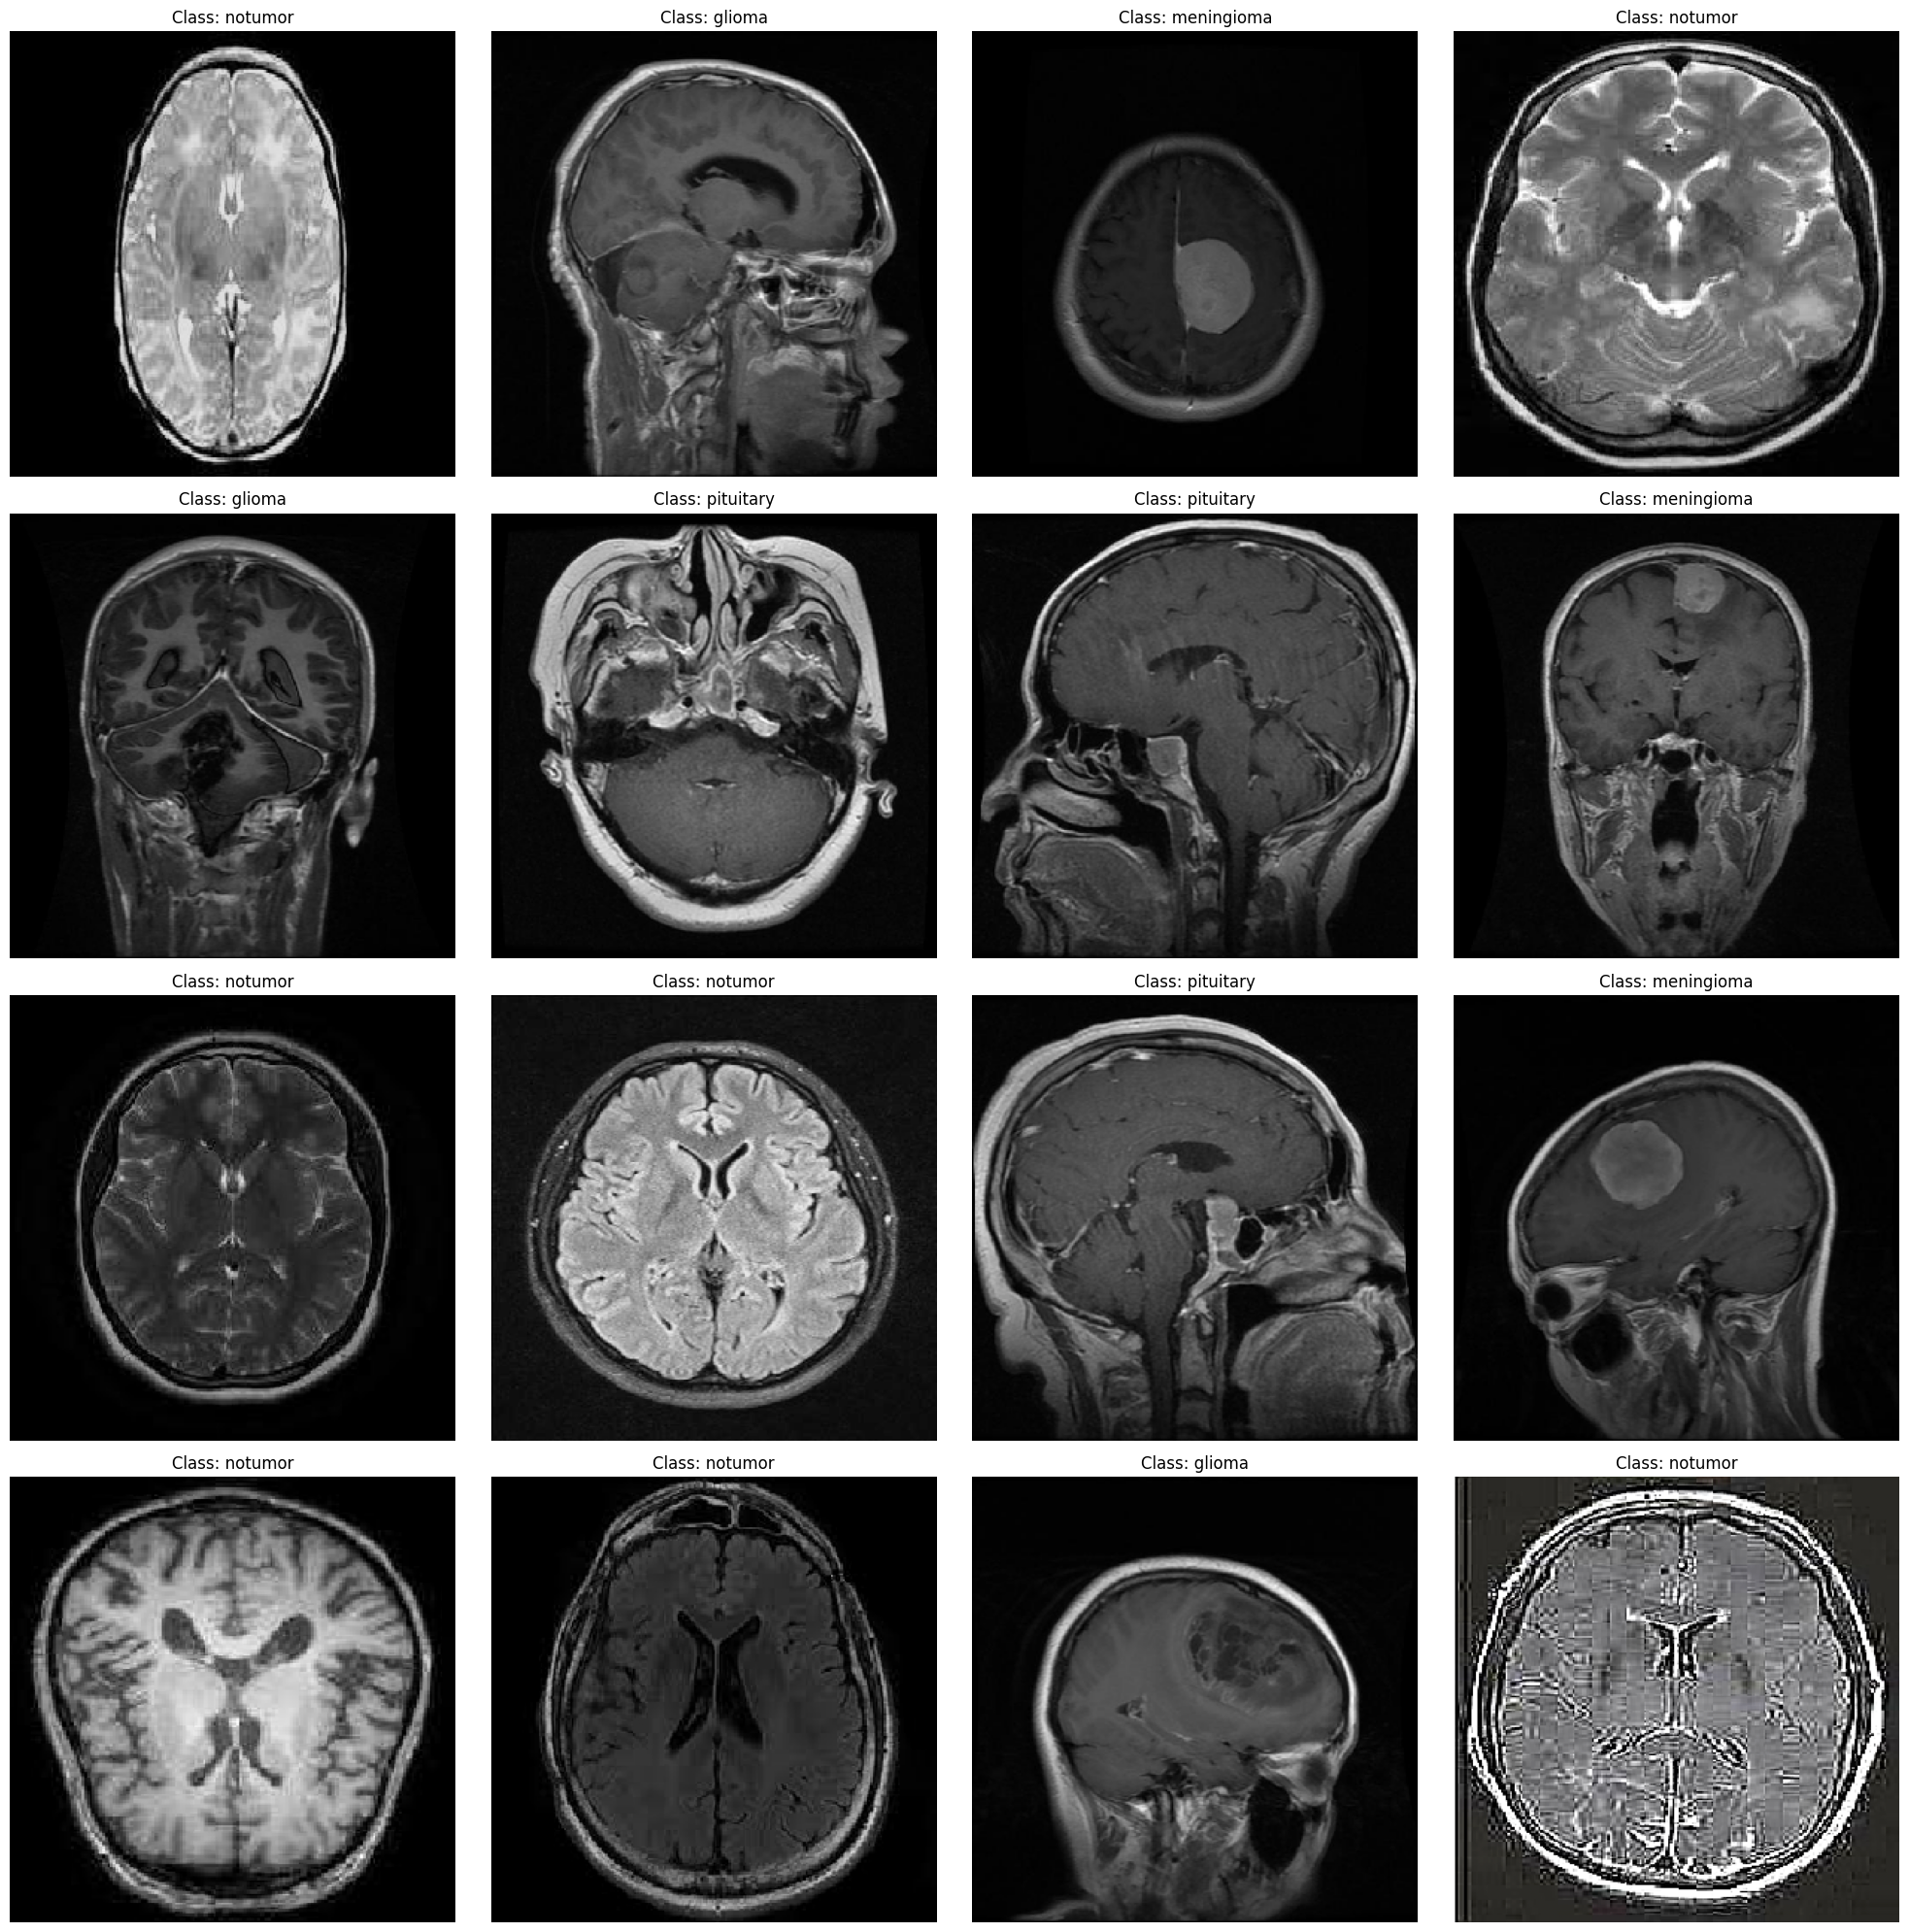

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  # Get the class index
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception (include_top= False,
                                             weights= "imagenet",
                                             input_shape= img_shape,
                                             pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

In [ ]:
model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/179 ━━━━━━━━━━━━━━━━━━━━ 5:04:21 103s/step - accuracy: 0.2500 - loss: 2.3246 - precision: 0.2857 - recall: 0.2500

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history [m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin (val_metrics [m])
  else:
    idx = np.argmax (val_metrics [m])
  best_epochs [m] = idx + 1
  best_values [m] = val_metrics [m] [idx]
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range (1, len(tr_metrics [metric]) + 1)

  plt.plot(epochs, tr_metrics [metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics [metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs [metric], best_values [metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs [metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle( 'Model Training Metrics Over Epochs', fontsize=16)
plt.show()

NameError: name 'hist' is not defined

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test loss: {test_score[0]:.4f}")

Confusion matricx

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image
def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims (img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions [0])

  # Get predicted class
  predicted_class_idx = np.argmax (probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh (labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")
  plt.tight_layout()
  plt.show()
  print (f"\nPredicted tumor type: {predicted_class}")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

### Custom CNN Model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
batch_size = 16
img_size = (224, 224)

image_generator = ImageDataGenerator (rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator (rescale=1/255)

tr_gen = image_generator.flow_from_dataframe (tr_df, x_col='Class Path',
                                              y_col='Class',
                                              batch_size=batch_size,
                                              target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                               y_col='Class',
                                               batch_size=batch_size,
                                               target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe (ts_df, x_col='Class Path',
                                   y_col='Class',
                                   batch_size=16,
                                   target_size=img_size, shuffle=False)

In [ ]:
# Create a Sequential model
cnn_model = Sequential()

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224,224,3), activation='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D (pool_size=(2, 2)))
cnn_model.add(Dropout (0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

#Fully connected layers
cnn_model.add(Dense (256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout (0.35))

cnn_model.add(Dense (4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax (learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(),Recall()])

 # Display the model summary
cnn_model.summary()

#Train the model for longer

In [ ]:
history = cnn_model.fit(tr_gen, epochs=8, validation_data=valid_gen)

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision_1', 'recall_1']
tr_metrics = {m: history.history [m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin (val_metrics [m])
  else:
    idx = np.argmax (val_metrics [m])
  best_epochs [m] = idx + 1
  best_values [m] = val_metrics [m] [idx]
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate (metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range (1, len(tr_metrics [metric]) + 1)

  plt.plot(epochs, tr_metrics [metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics [metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs [metric], best_values [metric], s=150, c='blue',
              label=f'Best epoch = {best_epochs [metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle( 'Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test loss: {test_score[0]:.4f}")

#show confusion matrix

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

In [ ]:
cnn_model.save("cnn_model.h5")

###Part 2: Streamlit web app

In [ ]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence) :

    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
    in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
    in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step
    """
    img = PIL.Image.open(img_path)
    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model. generate_content ( [prompt, img] )
    return response.text





def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]



    gradients = tape. gradient (target_class, img_tensor)
    gradients = tf.math.abs (gradients)
    gradients = tf. reduce_max (gradients, axis =- 1)
    gradients = gradients. numpy ( ) . squeeze()

    # Resize gradients to match original image size
    gradients = cv2. resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape [0] // 2, gradients. shape[1] // 2)
    radius = min (center [0], center [1] ) - 10
    y, x = np. ogrid [ : gradients. shape [0], : gradients. shape [1] ]
    mask = (x- center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients [mask]
    if brain_gradients.max() > brain_gradients.min() :
        brain_gradients = (brain_gradients - brain_gradients.min( ) ) / (brain_gradients.max( ) - brain_gradients.min( ))
    gradients [mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients [mask], 80)
    gradients [gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2. GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2. applyColorMap(np.uint8(255 * gradients), cv2. COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2. resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image. img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file. name)
    with open(img_path, "wb") as f:
        f. write (uploaded_file. getbuffer ( ) )

    saliency_map_path = f'saliency_maps/{uploaded_file. name}'

    # Save the saliency map
    cv2. imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))
    return superimposed_img


def load_xception_model(model_path):
    img_shape=(299,299,3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy',
                            Precision(),
                            Recall()])
    model.load_weights(model_path)

    return model




st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

#create a variable
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg","png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Xception", "Custom CNN")
    )
    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model('/content/xception_model.weights.h5')  # Load the model using the function
        img_size = (299, 299)
    else:
        model = load_model('/content/cnn_model.h5')
        img_size = (224, 224)


    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size = img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /=255.0

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Prediction Class: {result}")
    st.write("Prediction:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")


    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
    with col2:
        st.image(saliency_map, caption='Saliency Map', use_container_width=True)


    saliency_maps_path = f'saliency_maps/{uploaded_file.name}'
    explanation= generate_explanation(saliency_maps_path, result, prediction[0][class_index])
    st.write("##Explanation:")
    st.write(explanation)




Overwriting app.py


In [ ]:
# !pkill ngrok
# ngrok.set_auth_token(ngrok_token)

# # Start the Streamlit server in a separate thread
# thread = Thread(target=run_streamlit)
# thread.start()

In [ ]:
# %%writefile .env

# GOOGLE_API_KEY =

Writing .env


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://7af4-34-122-124-226.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Clossing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Clossing tunnel: https://a8e5-34-106-212-165.ngrok-free.app -> http://localhost:8501
